### Import Data

In [82]:
#Importing all the libriaries I need to perform my tests and the analysis and my csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

#Checking my csv
df = pd.read_csv('~/Downloads/assessment_da25.csv')
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


### Dataset Exploration

In [83]:
#Exploring my dataset
df.head()
df.info()

#Checking for duplicates
duplicates = df.duplicated().any()

if duplicates:
    print("Duplicates found")
else:
    print("No duplicates found")

#Checking for missing values
missing_values = df.isna().sum()
print("Current missing values:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB
No duplicates found
Current missing values:
Variant                  0
Number of page views     0
GMV (in $)               0
Number of add to cart    0
Clicks on media          0
Time on Page (sec)       0
user_id                  0
dtype: int64


In [84]:
#Exploring the summary statistic of my dataset
df.describe()

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.151000,8.489760,2.176500,1.409500,20.295000,999.500000
std,2.333864,27.861282,1.518387,1.208528,19.964676,577.494589
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,6.000000,499.750000
50%,5.000000,0.000000,2.000000,1.000000,14.000000,999.500000
75%,7.000000,0.000000,3.000000,2.000000,28.000000,1499.250000
max,15.000000,152.610000,10.000000,7.000000,143.000000,1999.000000


# Hypothesis
Null Hypothesis (H0): There is no significant difference in the average number of clicks on media between the Variant A and Variant B

Alternative Hypothesis (H1): There is a significantly increased difference in the average number of clicks on media on Variant B compared to Variant A.

## Primary metric : Clicks on Media

In [121]:
# Calculating the total clicks on media for each variant
total_clicks_a = df[df['Variant'] == 'A']['Clicks on media'].sum()
total_clicks_b = df[df['Variant'] == 'B']['Clicks on media'].sum()

print("Total clicks on media for Variant A:", total_clicks_a)
print("Total clicks on media for Variant B:", total_clicks_b)


Total clicks on media for Variant A: 1495
Total clicks on media for Variant B: 1324


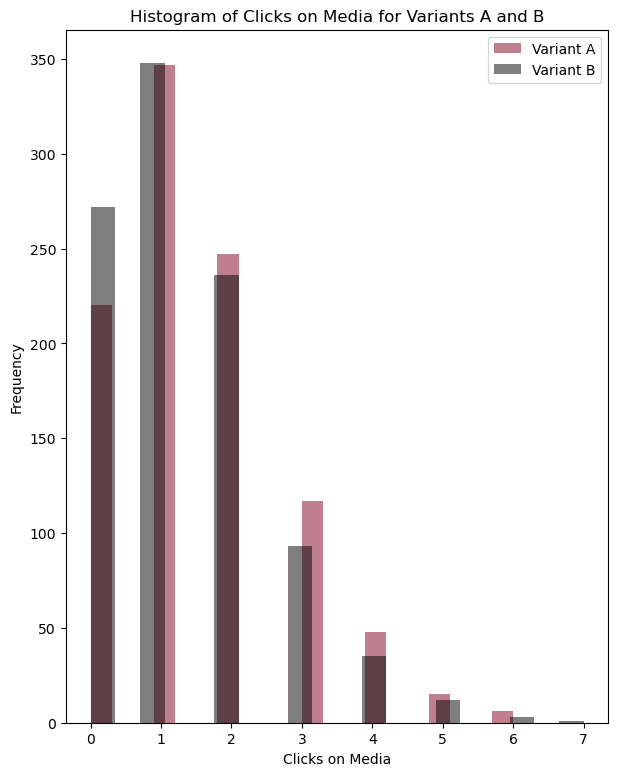

In [117]:
#Calculating the number of clicks for each variant
variant_a_clicks = df[df['Variant'] == 'A']['Clicks on media']
variant_b_clicks = df[df['Variant'] == 'B']['Clicks on media']

# Histograms for clicks on media
plt.figure(figsize=(7, 9))
plt.hist(variant_a_clicks, bins=20, alpha=0.5, label='Variant A', color='#800020')  # Burgundy color for Variant A
plt.hist(variant_b_clicks, bins=20, alpha=0.5, label='Variant B', color='black')  # Black color for Variant B
plt.title('Histogram of Clicks on Media for Variants A and B')
plt.xlabel('Clicks on Media')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Average Clicks on Media

In [97]:
#Calculating the average of clicks for each variant
variant_a_clicks = df[df['Variant'] == 'A']['Clicks on media'].mean()
variant_b_clicks = df[df['Variant'] == 'B']['Clicks on media'].mean()

print("Average clicks on media for Variant A:", variant_a_clicks)
print("Average clicks on media for Variant B:", variant_b_clicks)


Average clicks on media for Variant A: 1.495
Average clicks on media for Variant B: 1.324


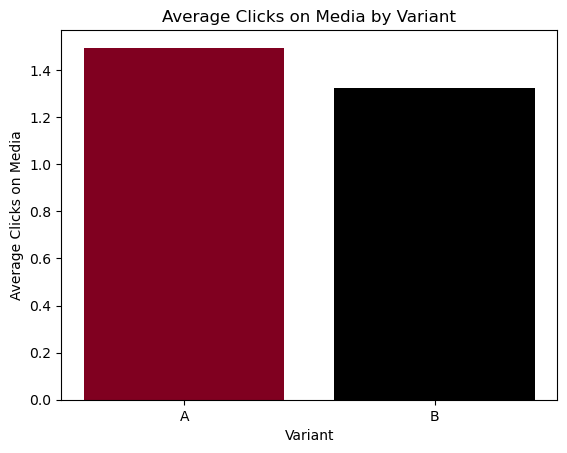

In [95]:
# Data
variants = ['A', 'B']
average_clicks = [variant_a_clicks, variant_b_clicks]

# Plot
plt.bar(variants, average_clicks, color=['#800020', 'black'])
plt.xlabel('Variant')
plt.ylabel('Average Clicks on Media')
plt.title('Average Clicks on Media by Variant')
plt.show()


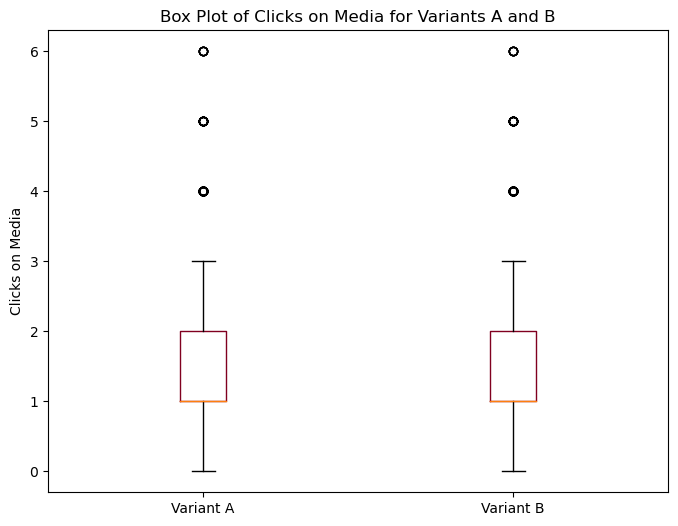

In [92]:
#Box Plotting Clicks on Media
plt.figure(figsize=(8, 6))
plt.boxplot([variant_a_clicks, variant_a_clicks], labels=['Variant A', 'Variant B'], boxprops=dict(color='#800020')) 
plt.title('Box Plot of Clicks on Media for Variants A and B')
plt.ylabel('Clicks on Media')
plt.show()

In [122]:
#At this point I want ot compare the avg of two independent groups running a T-test

# My signifecance level
alpha = 0.05
t_statistic, p_value = ttest_ind(variant_a_clicks, variant_b_clicks)

print("T-test of two independetn groups result:")
print("T-test:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis, the measured difference is statistically significant")
else:
    print("Fail to reject null hypothesis, the measured difference is not statistically significant")

T-test of two independetn groups result:
T-test: 3.1710702328903153
p-value: 0.0015418189281850279
Reject null hypothesis, the measured difference is statistically significant


# Secondary Metric (GMV)
### Hypothesis
Null Hypothesis (H0): There is no significant difference in the proportions of purchases between Variant A and Variant B.

Alternative Hypothesis (H1): There is a significantly difference in the proportions of purchases on Variant B compared to Variant A.

In [130]:
# Calculating the average GMV for each variant
sum_gmv_a = df[df['Variant'] == 'A']['GMV (in $)'].sum()
sum_gmv_b = df[df['Variant'] == 'B']['GMV (in $)'].sum()

print("Sum GMV for Variant A:", average_gmv_a)
print("Sum GMV for Variant B:", average_gmv_b)


Sum GMV for Variant A: 7689.989999999999
Sum GMV for Variant B: 9289.529999999999


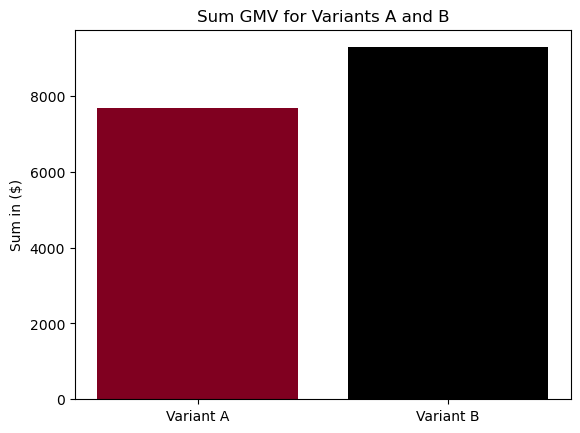

In [132]:
plt.bar(['Variant A', 'Variant B'], [sum_gmv_a, sum_gmv_b], color=['#800020', 'black'])  
plt.title('Sum GMV for Variants A and B')
plt.ylabel('Sum in ($)')
plt.show()

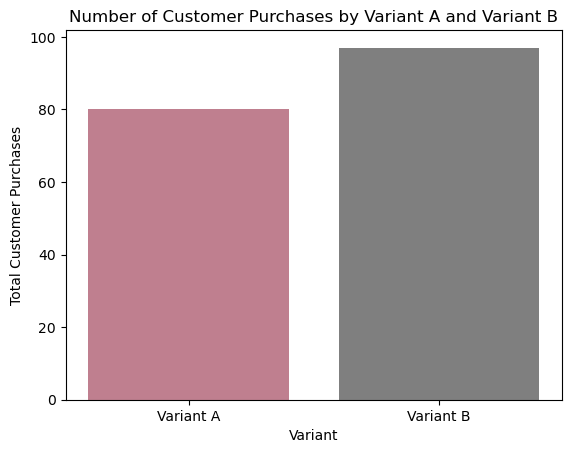

In [85]:
#I want to check if one of my variants has more customers than the other 
purchased = df["GMV (in $)"] > 0.0

# Total number of observations for each variant
tot_obs_a = df[variant_a].shape[0]
tot_obs_b = df[variant_b].shape[0]

#Checking the number of purchases for each variant
purchase_a = df[variant_a & purchased].shape[0]
purchase_b = df[variant_b & purchased].shape[0]

#Defining variant A and B
variants = ['Variant A', 'Variant B']
purchase_counts = [purchase_a, purchase_b]

# displaying a bar chart
plt.bar(variants, purchase_counts, color=['#800020', 'black'], alpha=0.5)
plt.xlabel('Variant')
plt.ylabel('Total Customer Purchases')
plt.title('Number of Customer Purchases by Variant A and Variant B')
plt.show()

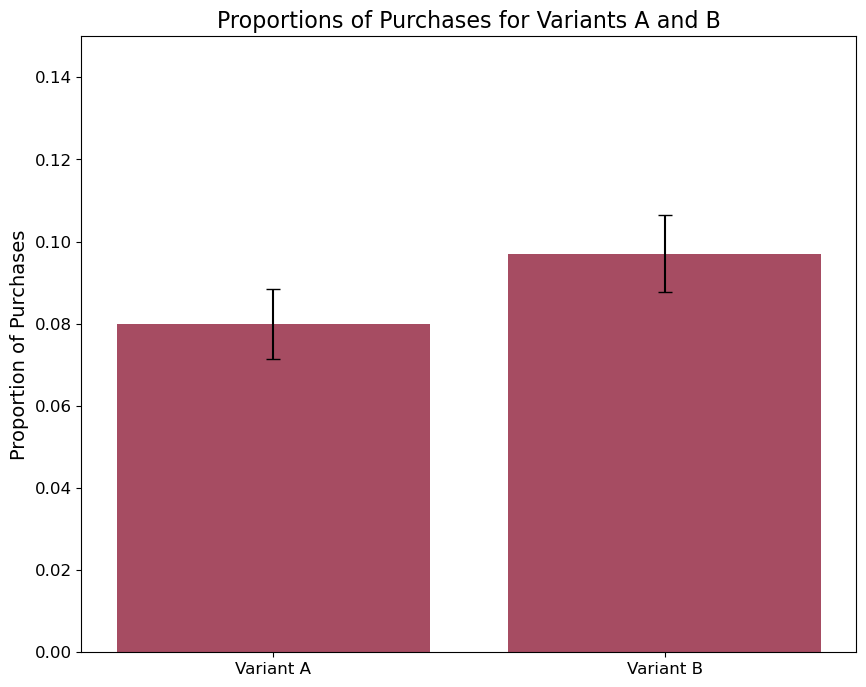

In [87]:
#Calculating the proportion of purchases for each variant by diving the number of purchases by the total number of observations
prop_a = purchase_a / tot_obs_a
prop_b = purchase_b / tot_obs_b

#Standard errors
standarderr_a = np.sqrt(prop_a * (1 - prop_a) / tot_obs_a)
standarderr_b = np.sqrt(prop_b * (1 - prop_b) / tot_obs_b)

#Bar Plotting the proportion
plt.figure(figsize=(10, 8))  
plt.bar(['Variant A', 'Variant B'], [prop_a, prop_b], yerr=[standarderr_a ,standarderr_b], capsize=5, color="#800020", alpha=0.7)
plt.title('Proportions of Purchases for Variants A and B', fontsize=16)
plt.ylabel('Proportion of Purchases', fontsize=14)   
plt.ylim(0, 0.15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()


### Running a Z-test

With the Z-test I want to assess whether there is a statistically significant difference in the proportions of purchases between two distinct groups.

In [86]:
#Calculting the non-purchases for each variant by subtracting the number of purchases from the total number of observations
non_purchases_a = tot_obs_a - purchase_a
non_purchases_b = tot_obs_b - purchase_b

#Performing the Z-test of my proportion
count = np.array([purchase_a, purchase_b])
nobs = np.array([tot_obs_a, tot_obs_b])
z_stat, p_value = proportions_ztest(count, nobs)

#Printing the results
print("Z-test results:")
print("Z-score:", z_stat)
print("P-value:", p_value)

#Running a loop to check the result of my test
if p_value < 0.05:
    print("Reject null hypothesis, the measured difference is statistically significant")
else:
    print("Fail to reject null hypothesis, the measured difference is not statistically significant")



Z-test results:
Z-score: -1.3383939096387558
P-value: 0.18076806320424155
Fail to reject null hypothesis, the measured difference is not statistically significant
